In [2]:
import numpy as np
import matplotlib.pyplot as plt

Fungsi keanggotaan untuk Suhu Ruangan

In [5]:
def dingin(x):
    return np.where(x <= 16, 1, np.where(x <= 22, (22 - x) / (22 - 16), 0))

def sedang_suhu(x):
    return np.where(x <= 20, 0, np.where(x <= 28, (x - 20) / (28 - 20),
                  np.where(x <= 34, (34 - x) / (34 - 28), 0)))

def panas(x):
    return np.where(x <= 30, 0, np.where(x <= 40, (x - 30) / (40 - 30), 1))

Fungsi keanggotaan untuk Kelembapan

In [8]:
def rendah(x):
    return np.where(x <= 20, 1, np.where(x <= 50, (50 - x) / (50 - 20), 0))

def sedang_kelembapan(x):
    return np.where(x <= 30, 0, np.where(x <= 70, (x - 30) / (70 - 30),
                  np.where(x <= 90, (90 - x) / (90 - 70), 0)))

def tinggi(x):
    return np.where(x <= 80, 0, np.where(x <= 100, (x - 80) / (100 - 80), 1))

Fungsi keanggotaan untuk Kecepatan Kipas

In [11]:
def lambat(x):
    return np.where(x <= 20, 1, np.where(x <= 40, (40 - x) / (40 - 20), 0))

def sedang_kipas(x):
    return np.where(x <= 30, 0, np.where(x <= 60, (x - 30) / (60 - 30),
                  np.where(x <= 80, (80 - x) / (80 - 60), 0)))

def cepat(x):
    return np.where(x <= 70, 0, np.where(x <= 100, (x - 70) / (100 - 70), 1))

Fuzzifikasi

In [14]:
def fuzzifikasi(suhu, kelembapan):
    return {
        "dingin": dingin(suhu),
        "sedang_suhu": sedang_suhu(suhu),
        "panas": panas(suhu),
        "rendah": rendah(kelembapan),
        "sedang_kelembapan": sedang_kelembapan(kelembapan),
        "tinggi": tinggi(kelembapan),
    }

Aturan Fuzzy

In [19]:
def fuzzy_rules(suhu, kelembapan):
    membership = fuzzifikasi(suhu, kelembapan)

    # Inferensi
    lambat_rule = np.fmin(membership["dingin"], membership["rendah"])  # AND
    sedang_rule = np.fmin(membership["sedang_suhu"], membership["sedang_kelembapan"])  # AND
    cepat_rule = np.fmax(membership["panas"], membership["tinggi"])  # OR

    return lambat_rule, sedang_rule, cepat_rule

Defuzzifikasi

In [22]:
def defuzzifikasi(suhu, kelembapan):
    lambat_rule, sedang_rule, cepat_rule = fuzzy_rules(suhu, kelembapan)

    # Output fuzzy
    x_kecepatan = np.linspace(0, 100, 100)
    lambat_output = np.fmin(lambat_rule, lambat(x_kecepatan))
    sedang_output = np.fmin(sedang_rule, sedang_kipas(x_kecepatan))
    cepat_output = np.fmin(cepat_rule, cepat(x_kecepatan))

    # Gabungkan semua output
    aggregated = np.fmax(lambat_output, np.fmax(sedang_output, cepat_output))

    # Defuzzifikasi (Centroid)
    return np.sum(aggregated * x_kecepatan) / np.sum(aggregated)

Visualisasi Fungsi Keanggotaan

In [25]:
x_suhu = np.linspace(16, 40, 100)
x_kelembapan = np.linspace(0, 100, 100)
x_kecepatan = np.linspace(0, 100, 100)

plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

Suhu Ruangan

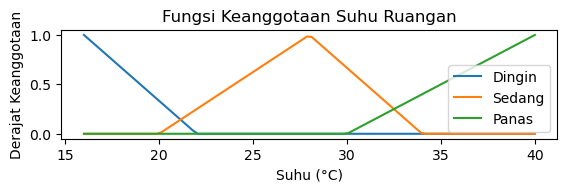

In [28]:
plt.subplot(3, 1, 1)
plt.plot(x_suhu, dingin(x_suhu), label="Dingin")
plt.plot(x_suhu, sedang_suhu(x_suhu), label="Sedang")
plt.plot(x_suhu, panas(x_suhu), label="Panas")
plt.title("Fungsi Keanggotaan Suhu Ruangan")
plt.xlabel("Suhu (°C)")
plt.ylabel("Derajat Keanggotaan")
plt.legend()

Kelembapan

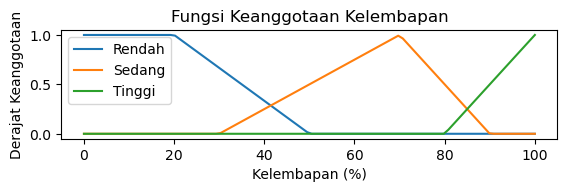

In [31]:
plt.subplot(3, 1, 2)
plt.plot(x_kelembapan, rendah(x_kelembapan), label="Rendah")
plt.plot(x_kelembapan, sedang_kelembapan(x_kelembapan), label="Sedang")
plt.plot(x_kelembapan, tinggi(x_kelembapan), label="Tinggi")
plt.title("Fungsi Keanggotaan Kelembapan")
plt.xlabel("Kelembapan (%)")
plt.ylabel("Derajat Keanggotaan")
plt.legend()

Kecepatan Kipas

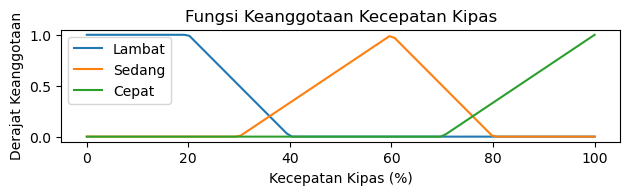

In [34]:
plt.subplot(3, 1, 3)
plt.plot(x_kecepatan, lambat(x_kecepatan), label="Lambat")
plt.plot(x_kecepatan, sedang_kipas(x_kecepatan), label="Sedang")
plt.plot(x_kecepatan, cepat(x_kecepatan), label="Cepat")
plt.title("Fungsi Keanggotaan Kecepatan Kipas")
plt.xlabel("Kecepatan Kipas (%)")
plt.ylabel("Derajat Keanggotaan")
plt.legend()

plt.tight_layout()
plt.show()

Contoh Penghitungan

In [37]:
suhu_input = 30  # Masukkan suhu ruangan
kelembapan_input = 70  # Masukkan kelembapan
output_kecepatan = defuzzifikasi(suhu_input, kelembapan_input)

In [39]:
print(f"Kecepatan kipas yang disarankan untuk suhu {suhu_input}°C dan kelembapan {kelembapan_input}% adalah {output_kecepatan:.2f}%")

Kecepatan kipas yang disarankan untuk suhu 30°C dan kelembapan 70% adalah 56.39%
